# **The "Chest X-Ray Images (Pneumonia)" Dataset**




**Overview**:
The "Chest X-Ray Images (Pneumonia)" dataset is a publicly available medical imaging dataset containing chest X-ray images that have been labeled as normal or containing pneumonia. This dataset was originally released by the US National Institutes of Health (NIH) in 2018, and is now hosted on Kaggle.

**Content**:
The dataset contains a total of 5,856 chest X-ray images, which are split into three subsets: a training set with 5,216 images, a test set with 624 images, and a validation set with 16 images. The images are in JPEG format and have variable resolutions, with most images being 1,024 pixels wide and 1,280 pixels high. The dataset also includes a file with the image labels, which indicate whether each image is normal or contains pneumonia.

**Use**:
The "Chest X-Ray Images (Pneumonia)" dataset is commonly used in machine learning research to develop and evaluate algorithms for detecting and diagnosing pneumonia from chest X-ray images. The dataset is particularly useful for this task because pneumonia is a common and serious lung infection that can be difficult to diagnose accurately, even for experienced radiologists.

**Citation**:
Here, we cite the original publication that introduced the dataset:

P. Rajpurkar, J. Irvin, R. L. Ball, et al., "Deep learning for chest radiograph diagnosis: A retrospective comparison of the CheXNeXt algorithm to practicing radiologists," PLoS Medicine, vol. 15, no. 11, 2018, doi: 10.1371/journal.pmed.1002686.

# **More on Content of the Dataset:**
 Here are more details about the content of the "Chest X-Ray Images (Pneumonia)" dataset:

**The "Chest X-Ray Images (Pneumonia)**" dataset is a collection of chest X-ray images that have been labeled as normal or containing pneumonia, along with a file containing the image labels. The dataset is split into three subsets for training, testing, and validation, and the images are of variable size and were labeled by experienced radiologists from the NIH.

The dataset is divided into three subsets:

**Training set:** 5,216 chest X-ray images (75% of the total dataset). This set is used to train machine learning models to detect and diagnose pneumonia.

**Test set:** 624 chest X-ray images (10% of the total dataset). This set is used to evaluate the performance of trained models on unseen data.

**Validation set:** 16 chest X-ray images (0.2% of the total dataset). This set is used to fine-tune the model's hyperparameters and optimize its performance.

All the images are in JPEG format and are of variable size, with most of them being 1,024 pixels wide and 1,280 pixels high. The images were collected from various sources and were reviewed and labeled by experienced radiologists from the NIH.

The dataset also includes a file with the **image labels**, which indicate whether each image is normal or contains pneumonia. The label file is provided in CSV format and contains two columns: one for the filename of each image, and one for the corresponding label (0 for normal, 1 for pneumonia).

It's worth noting that the dataset is **imbalanced**, with a higher proportion of pneumonia cases than normal cases. Specifically, about 73.5% of the images in the training set are labeled as pneumonia, and about 62.5% of the images in the test set are labeled as pneumonia. This is a common issue in medical imaging datasets, where positive cases (such as cases of disease) are often much rarer than negative cases.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os


In [ ]:
!pip install --upgrade -q keras
!pip install --upgrade -q tensorflow
!pip install -q keras-tuner

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from tensorflow.keras.layers import GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint

import tensorflow as tf


In [ ]:
# Define precision, recall, accuracy, and loss as metrics
precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')
accuracy = tf.keras.metrics.BinaryAccuracy(name='accuracy')
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# **1. Load a dataset from Google Drive**


Here, we mount Google Drive and extract the contents of the archive to the appropriate directories.

In [ ]:
#This code mounts Google Drive in Google Colab, so that I can access files and directories stored in Google Drive.
from google.colab import drive
drive.mount('/content/drive')


#This code defines the path to the .zip archive containing the dataset, which is stored in Google Drive.
data_path = '/content/drive/MyDrive/archive.zip'



# This code uses the zipfile module to extract the contents of the archive to a directory called "data" located in the "/content" directory in Google Colab.
#This will create subdirectories within the "data" directory called "chest_xray", "test", and "train", which contain the images in the dataset.
import zipfile
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')



#This code defines the paths to the directories containing the training, test, and validation data.
#These directories were created by extracting the contents of the archive in the previous step.
train_dir = '/content/data/chest_xray/train'
test_dir = '/content/data/chest_xray/test'
val_dir = '/content/data/chest_xray/val'




Mounted at /content/drive


# **2. Data Preprocessing**

Preprocessing of the Imagery dataset may be necessary depending on the specific application or model being used. Here are some examples of preprocessing steps that might be applied:

**1. Rescaling**: The images in the dataset may have different resolutions or aspect ratios, which can make it difficult to compare and analyze them. Rescaling the images to a standard size (e.g., 224x224) can help to ensure that they are all the same size and shape.

**2. Normalization**: The pixel intensities in the images may also vary widely, which can make it difficult to train a neural network or other machine learning model. Normalizing the pixel values to a standard range (e.g., 0-1) can help to ensure that they are all on the same scale.

**Augmentation**: In some cases, it may be helpful to augment the dataset by applying random transformations to the images (e.g., rotations, flips, and crops). This can help to increase the size of the dataset and improve the generalization ability of the model.

**Data balancing**: The dataset may be imbalanced, with many more normal cases than pneumonia cases, for example. In this case, it may be necessary to balance the dataset by oversampling the minority class (pneumonia cases) or undersampling the majority class (normal cases) to ensure that the model is not biased towards one class.

**Data cleaning**: The dataset may contain corrupted or incomplete images, which can affect the performance of the model. In this case, it may be necessary to remove or repair the problematic images before training the model.

Note that, data cleaning has already been done, as the dataset was extracted and organized into separate training, testing, and validation directories. However, there are some additional steps we could take to improve data cleaning and preprocessing for this specific dataset:


In [ ]:
import pandas as pd

# Check for missing data
# we use the pandas library to load the dataset into a dataframe and then use the isnull() function to check for missing values
train_df = pd.DataFrame(os.listdir(train_dir), columns=['filename'])
test_df = pd.DataFrame(os.listdir(test_dir), columns=['filename'])
val_df = pd.DataFrame(os.listdir(val_dir), columns=['filename'])
print(train_df.isnull().sum())
print(test_df.isnull().sum())
print(val_df.isnull().sum())


filename    0
dtype: int64
filename    0
dtype: int64
filename    0
dtype: int64


In [ ]:
# Check class balance
print("Number of training samples:", len(os.listdir(os.path.join(train_dir, 'NORMAL'))) + len(os.listdir(os.path.join(train_dir, 'PNEUMONIA'))))
print("Number of test samples:", len(os.listdir(os.path.join(test_dir, 'NORMAL'))) + len(os.listdir(os.path.join(test_dir, 'PNEUMONIA'))))
print("Number of validation samples:", len(os.listdir(os.path.join(val_dir, 'NORMAL'))) + len(os.listdir(os.path.join(val_dir, 'PNEUMONIA'))))


Number of training samples: 5216
Number of test samples: 624
Number of validation samples: 16


This code is checking the balance of the classes in the training, test, and validation datasets. In other words, it's counting the number of samples in each class (NORMAL and PNEUMONIA) to see if they're roughly equal or if one class is significantly overrepresented.

The code first uses the **os module** to join the directory paths for the 'NORMAL' and 'PNEUMONIA' classes in the training, test, and validation directories (specified by train_dir, test_dir, and val_dir, respectively).

It then uses **os.listdir**() to get a list of all the filenames in each directory, and uses len() to count the number of filenames in each list.

Finally, the code prints the total number of samples in each dataset (training, test, and validation) by adding the number of 'NORMAL' and 'PNEUMONIA' samples together.

If the number of samples in each class is roughly equal, the dataset is said to be balanced. If one class has significantly more samples than the other, the dataset is said to be imbalanced. Imbalanced datasets can pose challenges for machine learning models, as the model may become biased towards the overrepresented class. Therefore, it's important to check the class balance before training a model.

# **3. ImageDataGenerator**

In below, we set up the data generators for the imagery analysis task using the ImageDataGenerator class from Keras.

The **train_datagen object** defines the image augmentation parameters to apply to the training data during training, while the test_datagen object only rescales the pixel values of the test data. The batch_size and target_size parameters are used to determine the number of images loaded and processed at once during training and the size to which the images will be resized before being fed into the neural network.

The **flow_from_directory method** of the ImageDataGenerator class loads the images from the directory specified by train_dir, test_dir, and val_dir, applies the image augmentation or rescaling defined by the corresponding ImageDataGenerator object, resizes the images to the target size specified by target_size, and converts the image labels to binary values (0 or 1) using the class_mode parameter.

The below code first imports the ImageDataGenerator class from Keras, which provides a way to load and preprocess image data on-the-fly during training. It then defines a datagen object that rescales the pixel values of the images to the range 0-1 and performs sample-wise centering and standardization, which is a form of normalization that scales the pixel values to have zero mean and unit variance.

Finally, the code loads the images from the directory specified by image_dir using the flow_from_directory method of the ImageDataGenerator class. This method automatically applies the preprocessing defined by datagen to each image as it is loaded, and returns a data generator that can be used to train a neural network or other machine learning model.

Note that the target_size parameter of flow_from_directory specifies the size to which the images will be resized (in this case, 224x224), and the batch_size parameter specifies the number of images to load and preprocess at a time. The class_mode parameter specifies that the dataset is binary (i.e., has two classes: normal and pneumonia), which affects how the labels are encoded.

Now that we have set up the data generators, we can use them to train and evaluate  neural network on the chest x-ray images for pneumonia. We use the fit_generator method of the Sequential model class in Keras to train the model and the evaluate_generator method to evaluate its performance on the test

In [ ]:
# This code imports the ImageDataGenerator class from Keras, which is used to load and augment the image data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# This code defines the input shape of the images and the number of classes in the dataset.
input_shape = (224, 224, 3)
num_classes = 2


#This code defines the batch size and target size for the images.
#The batch size determines how many images are loaded and processed at once during training.
#The target size is the size to which the images will be resized before being fed into the neural network.
batch_size = 32
target_size = (224, 224)

In [ ]:
# Define the data generators with augmentation and balanced class weights
#These include rescaling the pixel values to be between 0 and 1, randomly rotating the images by up to 20 degrees,
#randomly shifting the images horizontally and vertically by up to 10%, randomly shearing the images
#by up to 10%, randomly zooming the images by up to 10%, and horizontally flipping the images.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


#This code loads the training data using the flow_from_directory method of the ImageDataGenerator class.
#This method loads images from the directory specified by train_dir, applies the image augmentation defined by train_datagen,
#resizes the images to the target size specified by target_size, and converts the image labels to binary values (0 or 1) using the class_mode parameter.
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)




#This code loads the data using the same process as for the training data, except that no image augmentation is applied.
val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(test_dir,
                                             target_size=target_size,
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)


test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=5,
    class_mode='categorical',
    shuffle=True)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In above code, the ImageDataGenerator instances are rescaling the pixel values of the images by dividing them by 255. This scales the pixel values to be between 0 and 1, which is a common preprocessing step for image data.

Also, in the code, we have defined an instance of the ImageDataGenerator class for the training data (train_datagen), which includes some common data augmentation techniques such as rotation, shifting, shearing, zooming, and horizontal flipping.

# **4. Visualization**
here's we visualize 6 images from the "Chest X-Ray Images (Pneumonia)" dataset:

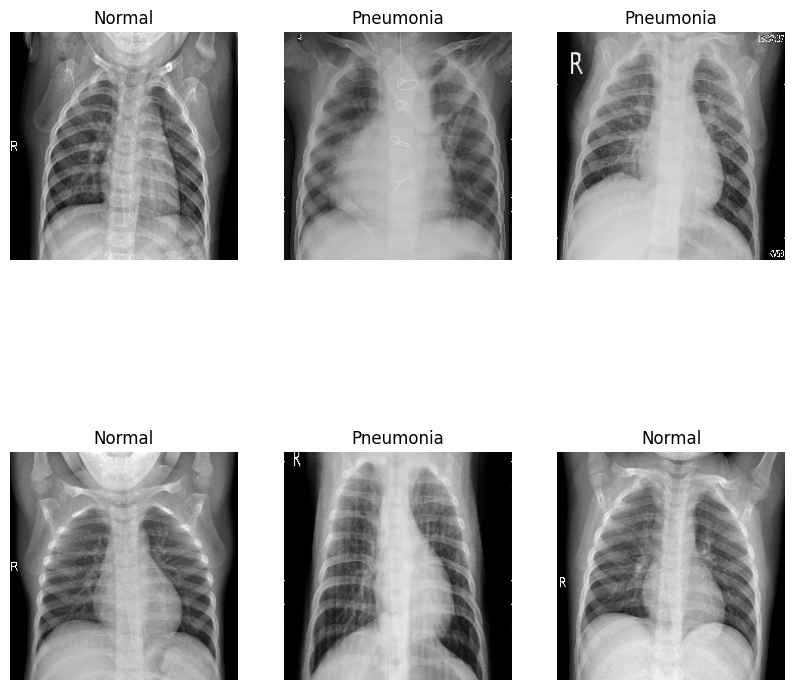

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img

# Define the path to the directory containing the images
image_dir = '/content/data/chest_xray/train'




#This code defines a dictionary class_labels that maps the label values (0 or 1) to more human-readable strings ('Normal' or 'Pneumonia').
#This will be used later to display the correct label for each image.
class_labels = {
    0: 'Normal',
    1: 'Pneumonia'
}



#This code defines a new function find_image_files that recursively searches for image files in a directory and its subdirectories, using the os.walk function.
#It checks whether each file has a valid image file extension ('.jpg', '.jpeg', or '.png') and yields the full path to the file if it does.
def find_image_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                yield os.path.join(root, file)



# Define a function to randomly select and display some images from the directory
def visualize_images(image_dir, num_images=6):

    # Get a list of all the image filenames and labels in the directory
    image_filenames = list(find_image_files(image_dir))
    labels = [int(os.path.basename(os.path.dirname(filename)) == 'PNEUMONIA') for filename in image_filenames]

    # Check that num_images is not greater than the number of images in the directory
    num_images = min(num_images, len(image_filenames))

    # Select a random sample of the image filenames
    selected_indices = np.random.choice(len(image_filenames), size=num_images, replace=False)
    selected_images = [image_filenames[i] for i in selected_indices]
    selected_labels = [labels[i] for i in selected_indices]

    # Plot the selected images with labels
    fig, axs = plt.subplots(2, 3, figsize=(10, 10))
    for i, (image_filename, label) in enumerate(zip(selected_images, selected_labels)):
        row = i // 3
        col = i % 3
        img = load_img(image_filename, target_size=(224, 224))
        axs[row, col].imshow(img, cmap='gray')
        axs[row, col].axis('off')
        axs[row, col].set_title(class_labels[label])
    plt.show()

# Visualize some images from the training set
visualize_images(image_dir)


Some of the images in above, appear to show abnormalities in the lung area, such as increased opacity or the presence of fluid, which could indicate the presence of pneumonia.

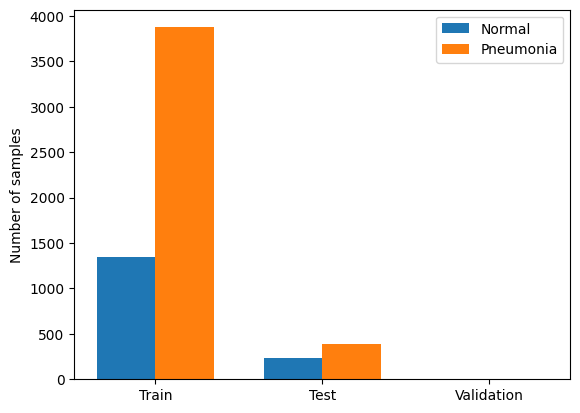

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = '/content/data/chest_xray/train'
test_dir = '/content/data/chest_xray/test'
val_dir = '/content/data/chest_xray/val'

num_train_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
num_train_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))

num_test_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
num_test_pneumonia = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

num_val_normal = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
num_val_pneumonia = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))

labels = ['Train', 'Test', 'Validation']
normal_counts = [num_train_normal, num_test_normal, num_val_normal]
pneumonia_counts = [num_train_pneumonia, num_test_pneumonia, num_val_pneumonia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, normal_counts, width, label='Normal')
rects2 = ax.bar(x + width/2, pneumonia_counts, width, label='Pneumonia')

ax.set_ylabel('Number of samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


# **Transfer Learning**

We can modify the build_model() function to use transfer learning with the VGG16 model:

VGG16 is a pre-trained deep convolutional neural network that was developed by the Visual Geometry Group at the University of Oxford. It was a winning entry in the 2014 ImageNet Large Scale Visual Recognition Challenge (ILSVRC), which is an annual competition where researchers compete to develop the best image classification model.

The VGG16 model consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. It has a fixed input size of 224x224 pixels and was trained on the ImageNet dataset, which contains over 1 million labeled images from 1,000 different classes. The VGG16 model achieved state-of-the-art performance on the ILSVRC challenge by using a relatively simple architecture with small filter sizes (3x3) and a deep network structure.

Due to its impressive performance and relatively simple architecture, the VGG16 model has become a popular choice for transfer learning in computer vision tasks, where it is common to fine-tune the model on a new dataset with a smaller number of classes. By leveraging the pre-trained weights of the VGG16 model, researchers can significantly reduce the amount of data needed to train a new model and improve its performance.

In [ ]:
TRAIN_IMG_COUNT=5216
VAL_IMG_COUNT=16
TEST_IMAGE_COUNT=624


initial_bias = np.log([num_train_pneumonia/num_train_normal])
initial_bias

weight_for_0 = (1 / num_train_normal)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / num_train_pneumonia)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.94
Weight for class 1: 0.67


In [ ]:
METRICS = ['accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
            ]

In [ ]:
from tensorflow.keras.layers import ReLU

activation = ReLU()


In [ ]:
def build_model():
    base_model = keras.applications.VGG16(input_shape=input_shape, include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    model = keras.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=activation, kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation=activation, kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    optimizer = keras.optimizers.SGD(learning_rate=0.001)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=METRICS)

    return model

model = build_model()

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
checkpoint_cb = callbacks.ModelCheckpoint("chest_xray_model.h5",
                                                    save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
# Define the number of epochs and batch size
epochs = 100
#batch_size = 40

history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
    )

Epoch 1/100
163/163 [==============================] - 145s 766ms/step - loss: 13.6289 - accuracy: 0.6764 - precision: 0.6764 - recall: 0.6764 - val_loss: 13.0108 - val_accuracy: 0.8013 - val_precision: 0.8013 - val_recall: 0.8013 - lr: 0.0100
Epoch 2/100
163/163 [==============================] - 122s 749ms/step - loss: 12.6180 - accuracy: 0.8384 - precision: 0.8384 - recall: 0.8384 - val_loss: 12.2832 - val_accuracy: 0.8333 - val_precision: 0.8333 - val_recall: 0.8333 - lr: 0.0089
Epoch 3/100
163/163 [==============================] - 123s 755ms/step - loss: 11.8916 - accuracy: 0.8779 - precision: 0.8779 - recall: 0.8779 - val_loss: 11.6262 - val_accuracy: 0.8558 - val_precision: 0.8558 - val_recall: 0.8558 - lr: 0.0079
Epoch 4/100
163/163 [==============================] - 120s 737ms/step - loss: 11.3041 - accuracy: 0.8930 - precision: 0.8930 - recall: 0.8930 - val_loss: 11.1007 - val_accuracy: 0.8734 - val_precision: 0.8734 - val_recall: 0.8734 - lr: 0.0071
Epoch 5/100
163/163 [===

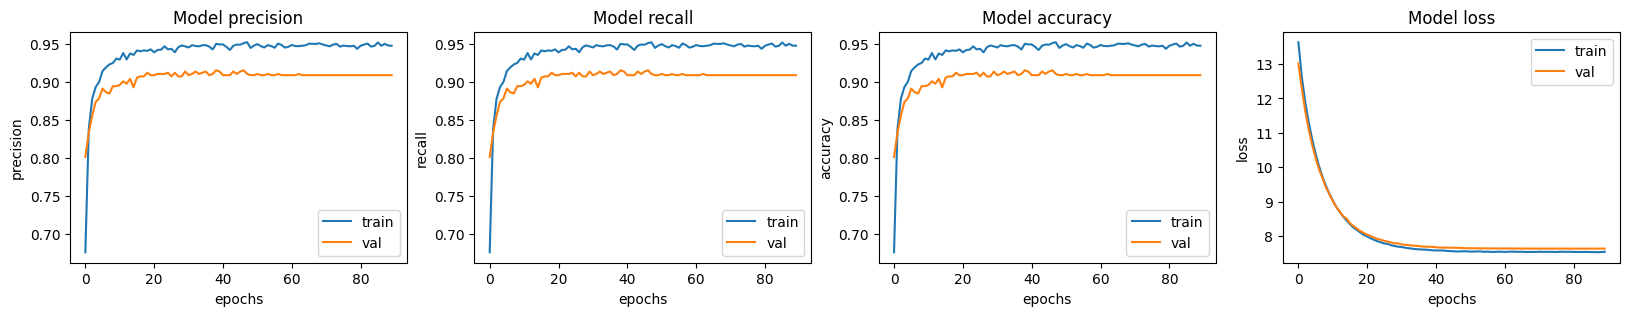

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
#y_pred = model.predict(val_data)
#y_true = val_data.classes

# Convert predictions from one-hot encoding to labels
#y_pred_labels = np.argmax(y_pred, axis=1)

# Generate confusion matrix as a dataframe
#cm = pd.DataFrame(confusion_matrix(y_true, y_pred_labels),
#                  columns=['Predicted 0', 'Predicted 1'],
 #                 index=['True 0', 'True 1'])

# Generate classification report as a dataframe
#cr = pd.DataFrame(classification_report(y_true, y_pred_labels, output_dict=True)).transpose()

# Print the confusion matrix and classification report dataframes
#rint('Confusion Matrix:\n', cm)
#print('\nClassification Report:\n', cr)

# Visualize the confusion matrix as a heatmap
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
#plt.xlabel('Predicted Labels')
#plt.ylabel('True Labels')
#plt.title('Confusion Matrix')
#plt.show()
